# Propriedades Magnéticas da Matéria

### Modelo de um "material magnético" em 2D

In [32]:
N=12; n=N+2
l=[[(2*randrange(2)-1) for k in range(n)] for j in range(n)]
m=matrix(l)
m[:,0]=0; m[:,n-1]=0; m[0,:]=0; m[n-1,:]=0
pretty_print(m)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[ 0 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1  1  0]
[ 0  1 -1  1 -1 -1  1  1  1  1 -1  1 -1  0]
[ 0 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1  1  0]
[ 0  1  1 -1  1 -1 -1 -1  1  1 -1  1  1  0]
[ 0  1 -1  1  1  1  1 -1 -1  1  1 -1 -1  0]
[ 0  1  1  1  1  1 -1 -1 -1  1 -1  1  1  0]
[ 0 -1  1  1  1  1  1 -1 -1  1  1 -1 -1  0]
[ 0 -1 -1  1  1 -1 -1  1 -1  1  1  1  1  0]
[ 0  1  1  1 -1 -1 -1  1 -1  1  1 -1  1  0]
[ 0 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1  0]
[ 0 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1  0]
[ 0  1 -1 -1 -1  1 -1  1  1  1 -1 -1  1  0]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]

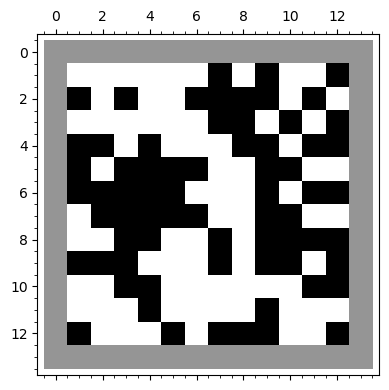

In [33]:
matrix_plot(m)

### Magnetização M (unidadeSI = A/m)

In [34]:
U=0
for i in range(1,N+1):
    for j in range(1,N+1):
        M+=m[i,j]
print(M)

-4


### Energia Magnética U 

In [35]:
U=0
for i in range(1,N+1):
    for j in range(1,N+1):
        u=m[i][j]*m[i-1][j]+m[i][j]*m[i+1][j]+m[i][j]*m[i][j-1]+m[i][j]*m[i][j+1]
        #print(i,j,m[i][j],u)
        U+=u
print(U)

28


In [23]:
beta=1

### Evolução Monte Carlo

In [36]:
mold=deepcopy(m)
for t in range(1000):
    for j in range(1,N+1):
        for k in range(1,N+1):
            u1=m[j][k]*m[j-1][k]+m[j][k]*m[j+1][k]+m[j][k]*m[j][k-1]+m[j][k]*m[j][k+1]
            m[j,k]=-m[j,k]
            u2=m[j][k]*m[j-1][k]+m[j][k]*m[j+1][k]+m[j][k]*m[j][k-1]+m[j][k]*m[j][k+1]
            du=beta*u2-beta*u1
            if (du <= 0):
                # keep flip
                u=u2
            else:
                if (randrange(2)==0):
                    #turn flip back
                    m[j,k]=-m[j,k]
                    u=u1
                else:
                    # keep flip (even with energy increase)
                    u=u2

In [22]:
beta

beta

In [70]:
pretty_print(m)

m

In [50]:
from sage.plot.matrix_plot import *

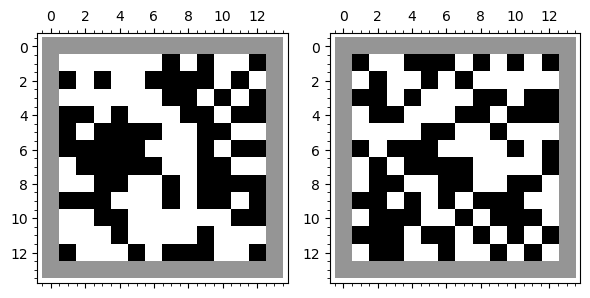

In [37]:
graphics_array((matrix_plot(mold),matrix_plot(m)))

### torque

In [90]:
from sage.plot.plot3d.plot3d import axes

In [150]:
lb=2;ia=0.6;ib=1;iw=2
bc='green';ic='blue';fc1='yellow';fc2='red'
p=line3d(((-ib,-ib,ib),(ib,-ib,-ib),(ib,ib,-ib),(-ib,ib,ib),(-ib,-ib,ib)),thickness=4,color=ic)
#p=line3d(((-1,-1,1),(-1,1,1),(1,1,-1),(1,-1,-1),(-1,-1,1)),thickness=8,color=ic)
p+=arrow3d((0,-ib,0),(ia,-ib,-ia),color=ic,width=iw)
p+=arrow3d((ib,0,-ib),(ib,ia,-ib),color=ic,width=iw)
p+=arrow3d((0,ib,0),(-ia,ib,ia),color=ic,width=iw)
p+=arrow3d((-ib,0,ib),(-ib,-ia,ib),color=ic,width=iw)
l=sum(flatten([[arrow((i,j,-lb),(i,j,+lb),color=bc,opacity=0.3) for j in range(-2,3)] for i in range(-2,3)]))
p+=l
p+=arrow3d((0,ib,0),(0,2*ib,0),color=fc1,width=2)
p+=arrow3d((0,-ib,0),(0,-2*ib,0),color=fc1,width=2)
p+=arrow3d((-ib,0,ib),(-2*ib,0,ib),color=fc2,width=2)
p+=arrow3d((ib,0,-ib),(2*ib,0,-ib),color=fc2,width=2)
p+=axes(2,1)
p+=text3d('B',(1.1,1.1,1.1),fontsize=30,color=bc)
p+=text3d('I',(-0.8,0,1.1),fontsize=30,color=ic)
p+=text3d('𝜃',(-0.2,ib,0.5),fontsize=30,color='black')
show(p,frame=false)

Graphics3d Object

In [74]:
arrow((0,-1,0),(-1,1,1),(1,-1,1)])

Graphics3d Object